# üîÑ M√©todo del Codo con KMeans

Con este notebook podr√°s comprender c√≥mo aplicar el m√©todo del codo para determinar el n√∫mero √≥ptimo de cl√∫steres al realizar agrupamiento con KMeans. Utilizaremos un conjunto de datos de Kaggle: **Mall Customer Segmentation Data**.

## ¬øQu√© es el M√©todo del Codo?

El m√©todo del codo es una t√©cnica visual utilizada para determinar el n√∫mero √≥ptimo de cl√∫steres mediante el algoritmo K-Means. Su **objetivo** es encontrar el equilibrio entre la cantidad de cl√∫steres y la compactaci√≥n de los datos, es decir, encontrar el punto en el cual al agregar m√°s cl√∫steres, se deja de proporcionar una mejora significativa en la agrupaci√≥n de diferentes grupos. 

Para ello, se ejecuta el algoritmo K-Means para diferentes valores de ùëò (n√∫mero de cl√∫steres), generalmente desde k = 1 hasta un valor razonable y calcular la suma de las distancias al cuadrado de cada punto respecto a su centroide. Se generar√°n resultados para crear una gr√°fica con los valores de k en el eje x y la suma de las distancias al cuadrado en el eje y. En esta gr√°fica se busca el punto donde se produce un cambio brusco en la disminuci√≥n de la suma de las distancias al cuadrado. Punto en el que la curva muestra la forma de un codo. El n√∫mero √≥ptimo de cl√∫steres corresponde a este punto.

## üéØ Objetivos

- Importar y explorar datos de una fuente en l√≠nea.
- Preprocesar los datos.
- Implementar el m√©todo del codo para encontrar el n√∫mero √≥ptimo de cl√∫steres.
- Aplicar KMeans y visualizar los resultados.
- Interpretar los resultados.

## Ventajas

‚úÖ F√°cil de entender e implementar.

‚úÖ Visualizaci√≥n clara para decidir el n√∫mero de cl√∫steres.

## Desventajas

‚ùó Puede ser dif√≠cil identificar el codo visualmente si la curva es muy suave.

‚ùó No siempre funciona bien con datos complejos o de alta dimensionalidad.



# üìù Pasos para Aplicar el M√©todo del Codo

1. Ejecutar K-Means para diferentes valores de k (n√∫mero de cl√∫steres).

2. Calcular la Suma de los Errores Cuadr√°ticos (SSE):

$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

### Donde:

- $C_i$ = Conjunto de puntos en el cl√∫ster $i$
- $\mu_i$ = Centroide del cl√∫ster $i$

3. Graficar SSE vs. k y observar el punto donde la disminuci√≥n se vuelve menos pronunciada (el codo).

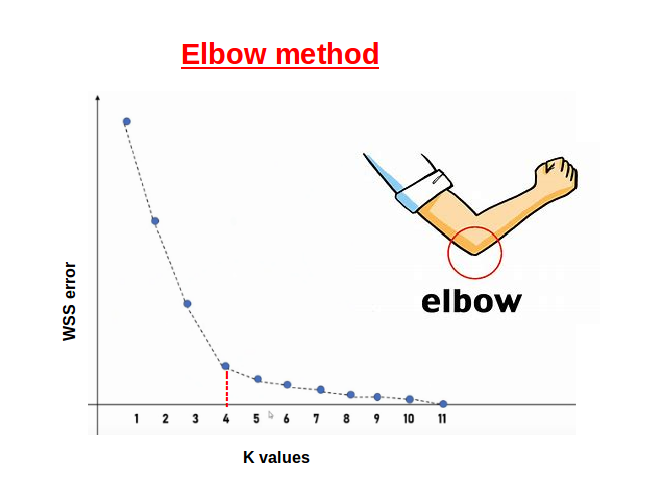


## EJERCICIO CASO PR√ÅCTICO

In [4]:

# Instalaci√≥n de bibliotecas necesarias (si es necesario)
!pip install pandas matplotlib scikit-learn
!pip install seaborn
!pip install ipywidgets


In [8]:

# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Configuraci√≥n para gr√°ficos m√°s est√©ticos
sns.set(style="whitegrid")



## Cargar el conjunto de datos
Descargaremos el conjunto de datos "Mall Customer Segmentation Data".


In [9]:

# Cargar datos directamente desde una URL
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
data = pd.read_csv(url)

# Mostrar las primeras 5 filas del conjunto de datos
# Esto nos ayuda a entender c√≥mo est√°n organizados los datos
data.head()


CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Exploraci√≥n inicial de los datos (EDA)
Revisaremos la estructura del conjunto de datos para entender qu√© columnas son relevantes para el an√°lisis.


In [10]:

# Informaci√≥n general sobre el conjunto de datos
data.info()

# Estad√≠sticas descriptivas b√°sicas como media, desviaci√≥n est√°ndar, m√≠nimos y m√°ximos
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## Selecci√≥n de caracter√≠sticas
Para este ejemplo, utilizaremos las columnas `Annual Income (k$)` y `Spending Score (1-100)` para realizar la agrupaci√≥n.


In [11]:

# Selecci√≥n de caracter√≠sticas relevantes para agrupamiento de clientes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Mostrar las primeras filas de las caracter√≠sticas seleccionadas
X.head()


Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


## M√©todo del Codo

Encontrar el n√∫mero √≥ptimo de cl√∫steres al observar la "inercia" o suma de distancias cuadradas internas.


C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

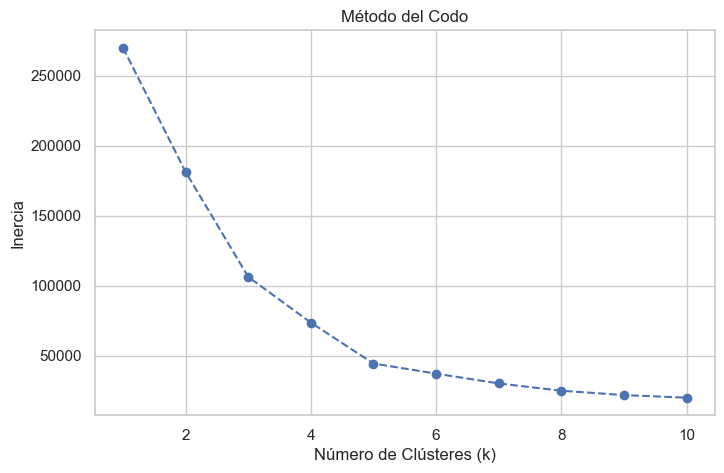

In [16]:

# Calcular el m√©todo del codo

# Crear una lista vac√≠a para almacenar la inercia de cada valor de k
inertia = [] 
# Definir rango de valores a probar, en este caso del 1 al 10
range_k = range(1, 11) 

# Iterar sobre cada valor de k
for k in range_k:
    # Crear un modelo con k cl√∫steres (rango) y una semilla aleatoria para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar modelo a datos
    kmeans.fit(X)
    
     # Inercia mide la suma de las distancias cuadradas de cada punto al centroide de su cl√∫ster
    inertia.append(kmeans.inertia_)

# Visualizar el m√©todo del codo
# Se ajusta a un tama√±o y se define eje x, eje y, leyendas, marcadores circulares, estilo de l√≠nea, nombre de etiquetas y t√≠tulo
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.xlabel('N√∫mero de Cl√∫steres (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo')
plt.show()


### Rango de 1 a 10 para el n√∫mero de cl√∫steres (k)

El rango de 1 a 10 para el n√∫mero de cl√∫steres (k) en este caso se eligi√≥ por varias razones pr√°cticas:

1. Experimentaci√≥n: Un rango entre 1 y 10 es com√∫nmente utilizado cuando se experimenta con el algoritmo K-Means, ya que no se sabe de antemano cu√°l es el n√∫mero √≥ptimo de cl√∫steres. Este rango es suficientemente amplio para explorar las posibilidades de segmentaci√≥n sin hacerlo demasiado grande.

2. Balance: Elegir un rango muy grande podr√≠a hacer que el proceso de ejecuci√≥n sea m√°s largo, y para muchos conjuntos de datos, un n√∫mero de cl√∫steres superior a 10 podr√≠a no a√±adir un valor significativo en t√©rminos de segmentaci√≥n. En general, los datos suelen ser bien representados con entre 3 a 10 cl√∫steres.

3. Visibilidad: El rango de 1 a 10 es conveniente para observar el "codo" en la gr√°fica, donde el cambio en la disminuci√≥n de la inercia (distancia interna del cl√∫ster) ya no es tan significativo. Esto facilita la identificaci√≥n visual del n√∫mero √≥ptimo de cl√∫steres.


## Aplicar KMeans con el n√∫mero √≥ptimo de cl√∫steres

Como se puede apreciar en el gr√°fico anterior, el n√∫mero √≥ptimo de cl√∫steres esta entre 5 y 6, ya que entre esos valores, se observa el primer quiebre de la curva anterior (el gr√°fico del m√©todo del codo) ya que es donde la disminuci√≥n de la inercia se vuelve menos pronunciada.

Con el siguiente c√≥digo, de forma visual e interactiva, se puede comprobar que el valor √≥ptimo es 5.


In [14]:
import matplotlib.pyplot as plt #librer√≠as para graficar
import seaborn as sns # gr√°ficos m√°s estilizados
from sklearn.cluster import KMeans # algoritmo K-Means
import ipywidgets as widgets #interfaces interactivas
from IPython.display import display, clear_output #mosrtar y limpiar

# Crear un slider para seleccionar el n√∫mero de cl√∫steres
k_slider = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Cl√∫steres:', continuous_update=False)

# Crear un √°rea de salida para el gr√°fico
output = widgets.Output()

# Funci√≥n para actualizar el gr√°fico
def actualizar_grafico(change):
    # Mostrar el valor de k en un slider
    k = change['new']
    # Crear modelo KMeans con el valor de k
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar modelo y predecir cl√∫steres
    data['Cluster'] = kmeans.fit_predict(X)

    # Mostrar gr√°fico en √°rea de salida, limpiar y crear gr√°fica
    with output:
        clear_output(wait=True)
        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            x='Annual Income (k$)',
            y='Spending Score (1-100)',
            # Colorear puntos seg√∫n Cluster
            hue='Cluster',
            data=data,
            palette='Set2',
            s=100 #Tama√±o de puntos
        )
        plt.title(f'Agrupaci√≥n de Clientes (KMeans) con {k} Cl√∫steres')
        plt.show()

# Conectar el slider con la funci√≥n de actualizaci√≥n
k_slider.observe(actualizar_grafico, names='value')

# Mostrar el slider y el √°rea de salida en una disposici√≥n vertical
display(widgets.VBox([k_slider, output]))

# Generar el gr√°fico inicial
actualizar_grafico({'new': k_slider.value})


C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



## Conclusiones y Recomendaciones

#### ¬°Hemos aplicado con √©xito el m√©todo del codo!

üîë Recuerda: El m√©todo del codo se utiliza para identificar el n√∫mero √≥ptimo de cl√∫steres üìä mediante la visualizaci√≥n de la inercia (la suma de las distancias al cuadrado de cada punto respecto a su centroide). Al graficar la inercia en funci√≥n de k (n√∫mero de cl√∫steres), buscamos el punto donde la disminuci√≥n de la inercia comienza a ser menos pronunciada, formando una curva en forma de "codo".

En este caso, al ajustar el n√∫mero de cl√∫steres entre 1 y 10, se observa un codo claro en el gr√°fico alrededor de k=5. Esto sugiere que 5 es un n√∫mero apropiado de cl√∫steres para segmentar a los clientes de manera efectiva. Esto significa que 5 es el punto donde a√±adir m√°s cl√∫steres no mejora significativamente la segmentaci√≥n. Es importante recordar que el n√∫mero exacto de cl√∫steres puede variar seg√∫n el contexto o el tipo de an√°lisis.

El modelo K-Means ayuda a agrupar a los clientes seg√∫n sus caracter√≠sticas, como el ingreso anual üíµ y la puntuaci√≥n de gasto üí≥. Al segmentar los clientes en cl√∫steres, podemos identificar patrones o grupos de clientes con caracter√≠sticas similares, lo que puede ser √∫til para estrategias de marketing personalizadas o para mejorar la atenci√≥n al cliente ü§ù.

Aunque el m√©todo del codo es √∫til para determinar el n√∫mero de cl√∫steres, en algunos casos el "codo" puede ser poco claro. En ese caso, puede ser √∫til combinar este m√©todo con otras t√©cnicas, como la validaci√≥n cruzada o el an√°lisis de la estabilidad de los cl√∫steres.

Si es necesario, se puede ampliar el rango de k para explorar un n√∫mero mayor de cl√∫steres (por ejemplo, de 1 a 15) si se piensa que 10 valores no son suficientes para encontrar un patr√≥n claro.

Despu√©s de identificar el n√∫mero √≥ptimo de cl√∫steres, es recomendable revisar la calidad de la segmentaci√≥n, observando c√≥mo se distribuyen los clientes dentro de los cl√∫steres y si los grupos resultantes son coherentes con lo que se espera o tiene sentido desde el punto de vista del negocio üíº.